In [1]:
from pyomo.environ import (Constraint,
                           Var,
                           ConcreteModel,
                           Expression,
                           Param,
                           Objective,
                           SolverFactory,
                           TransformationFactory,
                           value)
                           
from idaes.core import FlowsheetBlock
from pyomo.opt import TerminationCondition, SolverStatus
                           
from idaes.generic_models.properties.core.generic.generic_property import (
        GenericParameterBlock)
                           
from HFCS_bmimAc_PR import configuration as config1
from HFCS_bmimPF6_PR import configuration as config2
from HFCS_emimTf2N_PR import configuration as config3
from HFCS_hmimCl_PR import configuration as config4

from idaes.generic_models.unit_models import Flash

from idaes.core.util.model_statistics import degrees_of_freedom

import idaes.logger as idaeslog

# Import plotting functions
import matplotlib.pyplot as plt

# Import numpy library 
import numpy as np

In [2]:
m1 = ConcreteModel()

m1.fs = FlowsheetBlock(default={"dynamic": False})

m1.fs.properties = GenericParameterBlock(default=config1)

m1.fs.F101 = Flash(default={"property_package": m1.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

m2 = ConcreteModel()

m2.fs = FlowsheetBlock(default={"dynamic": False})

m2.fs.properties = GenericParameterBlock(default=config2)

m2.fs.F101 = Flash(default={"property_package": m2.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

m3 = ConcreteModel()

m3.fs = FlowsheetBlock(default={"dynamic": False})

m3.fs.properties = GenericParameterBlock(default=config3)

m3.fs.F101 = Flash(default={"property_package": m3.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

m4 = ConcreteModel()

m4.fs = FlowsheetBlock(default={"dynamic": False})

m4.fs.properties = GenericParameterBlock(default=config4)

m4.fs.F101 = Flash(default={"property_package": m4.fs.properties,
                           "has_heat_transfer": True,
                           "has_pressure_change": True})

2021-04-29 15:16:34 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-29 15:16:34 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-29 15:16:34 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.
2021-04-29 15:16:34 [INFO] idaes.generic_models.properties.core.generic.generic_property: DEPRECATED - definiton of generic property packages is moving to using static classes instead of modules. Please refer to the IDAES documentation.


In [3]:
m1.fs.F101.inlet.flow_mol.fix(1)
m1.fs.F101.inlet.temperature.fix(298.15)
m1.fs.F101.inlet.pressure.fix(100000)
m1.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.2)
m1.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(0.1)
m1.fs.F101.inlet.mole_frac_comp[0,'bmimAc'].fix(0.7)

m2.fs.F101.inlet.flow_mol.fix(1)
m2.fs.F101.inlet.temperature.fix(298.15)
m2.fs.F101.inlet.pressure.fix(100000)
m2.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.2)
m2.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(0.1)
m2.fs.F101.inlet.mole_frac_comp[0,'bmimPF6'].fix(0.7)

m3.fs.F101.inlet.flow_mol.fix(1)
m3.fs.F101.inlet.temperature.fix(298.15)
m3.fs.F101.inlet.pressure.fix(100000)
m3.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.2)
m3.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(0.1)
m3.fs.F101.inlet.mole_frac_comp[0,'emimTf2N'].fix(0.7)

m4.fs.F101.inlet.flow_mol.fix(1)
m4.fs.F101.inlet.temperature.fix(298.15)
m4.fs.F101.inlet.pressure.fix(100000)
m4.fs.F101.inlet.mole_frac_comp[0,'R32'].fix(0.2)
m4.fs.F101.inlet.mole_frac_comp[0,'R125'].fix(0.1)
m4.fs.F101.inlet.mole_frac_comp[0,'hmimCl'].fix(0.7)

m1.fs.F101.vap_outlet.pressure.fix(100000)
m2.fs.F101.vap_outlet.pressure.fix(100000)
m3.fs.F101.vap_outlet.pressure.fix(100000)
m4.fs.F101.vap_outlet.pressure.fix(100000)

m1.fs.F101.vap_outlet.temperature.fix(286.15)
m2.fs.F101.vap_outlet.temperature.fix(286.15)
m3.fs.F101.vap_outlet.temperature.fix(286.15)
m4.fs.F101.vap_outlet.temperature.fix(286.15)

In [4]:
print(degrees_of_freedom(m1.fs.F101))

0


In [5]:
solver = SolverFactory('ipopt')
solver.options = {'tol': 1e-6}

In [6]:
P = [100000,150000,200000,250000,300000,350000,400000,450000,
     500000,550000,600000,650000,700000,750000,800000,850000,
     900000,950000,1000000]
T = [286,300,310,320,330,340,350,360,370,380,390,400]

IL_x1 = np.zeros((len(P),(len(T))))
IL_y1 = np.zeros((len(P),(len(T))))
R32_x1 = np.zeros((len(P),(len(T))))
R32_y1 = np.zeros((len(P),(len(T))))
R125_x1 = np.zeros((len(P),(len(T))))
R125_y1 = np.zeros((len(P),(len(T))))
L1 = np.zeros((len(P),(len(T))))
V1 = np.zeros((len(P),(len(T))))

IL_x2 = np.zeros((len(P),(len(T))))
IL_y2 = np.zeros((len(P),(len(T))))
R32_x2 = np.zeros((len(P),(len(T))))
R32_y2 = np.zeros((len(P),(len(T))))
R125_x2 = np.zeros((len(P),(len(T))))
R125_y2 = np.zeros((len(P),(len(T))))
L2 = np.zeros((len(P),(len(T))))
V2 = np.zeros((len(P),(len(T))))

IL_x3 = np.zeros((len(P),(len(T))))
IL_y3 = np.zeros((len(P),(len(T))))
R32_x3 = np.zeros((len(P),(len(T))))
R32_y3 = np.zeros((len(P),(len(T))))
R125_x3 = np.zeros((len(P),(len(T))))
R125_y3 = np.zeros((len(P),(len(T))))
L3 = np.zeros((len(P),(len(T))))
V3 = np.zeros((len(P),(len(T))))

IL_x4 = np.zeros((len(P),(len(T))))
IL_y4 = np.zeros((len(P),(len(T))))
R32_x4 = np.zeros((len(P),(len(T))))
R32_y4 = np.zeros((len(P),(len(T))))
R125_x4 = np.zeros((len(P),(len(T))))
R125_y4 = np.zeros((len(P),(len(T))))
L4 = np.zeros((len(P),(len(T))))
V4 = np.zeros((len(P),(len(T))))

for j in range(len(T)):
    m1.fs.F101.vap_outlet.temperature.fix(T[j])
    m2.fs.F101.vap_outlet.temperature.fix(T[j])
    m3.fs.F101.vap_outlet.temperature.fix(T[j])
    m4.fs.F101.vap_outlet.temperature.fix(T[j]) 
    
    for i in range(len(P)):

        print(P[i])

        m1.fs.F101.vap_outlet.pressure.fix(P[i])
        m2.fs.F101.vap_outlet.pressure.fix(P[i])
        m3.fs.F101.vap_outlet.pressure.fix(P[i])
        m4.fs.F101.vap_outlet.pressure.fix(P[i])

        m1.fs.F101.initialize(outlvl=idaeslog.CRITICAL)    
        m2.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
        m3.fs.F101.initialize(outlvl=idaeslog.CRITICAL)
        m4.fs.F101.initialize(outlvl=idaeslog.CRITICAL)

        # solve the model
        status1 = solver.solve(m1, tee = False)
        status2 = solver.solve(m2, tee = False)
        status3 = solver.solve(m3, tee = False)
        status4 = solver.solve(m4, tee = False)

        # model.display()
        # If solution is optimal store the concentration, and calculated temperatures in the created arrays
        if (status1.solver.status == SolverStatus.ok) and (status1.solver.termination_condition == TerminationCondition.optimal):

            IL_x1[i,j] = value(m1.fs.F101.liq_outlet.mole_frac_comp[0, "bmimAc"])
            IL_y1[i,j] = value(m1.fs.F101.vap_outlet.mole_frac_comp[0, "bmimAc"])
            R32_x1[i,j] = value(m1.fs.F101.liq_outlet.mole_frac_comp[0, "R32"]) 
            R32_y1[i,j] = value(m1.fs.F101.vap_outlet.mole_frac_comp[0, "R32"])
            R125_x1[i,j] = value(m1.fs.F101.liq_outlet.mole_frac_comp[0, "R125"])
            R125_y1[i,j] = value(m1.fs.F101.vap_outlet.mole_frac_comp[0, "R125"])
            L1[i,j] = value(m1.fs.F101.liq_outlet.flow_mol[0])
            V1[i,j] = value(m1.fs.F101.vap_outlet.flow_mol[0])

        else:
            IL_x1[i,j] = "NAN"
            IL_y1[i,j] = "NAN"
            R32_x1[i,j] = "NAN"
            R32_y1[i,j] = "NAN"
            R125_x1[i,j] = "NAN"
            R125_y1[i,j] = "NAN"
            L1[i,j] = "NAN"
            V1[i,j] = "NAN"
            
        if (status2.solver.status == SolverStatus.ok) and (status2.solver.termination_condition == TerminationCondition.optimal):
            IL_x2[i,j] = value(m2.fs.F101.liq_outlet.mole_frac_comp[0, "bmimPF6"])
            IL_y2[i,j] = value(m2.fs.F101.vap_outlet.mole_frac_comp[0, "bmimPF6"])
            R32_x2[i,j] = value(m2.fs.F101.liq_outlet.mole_frac_comp[0, "R32"]) 
            R32_y2[i,j] = value(m2.fs.F101.vap_outlet.mole_frac_comp[0, "R32"])
            R125_x2[i,j] = value(m2.fs.F101.liq_outlet.mole_frac_comp[0, "R125"])
            R125_y2[i,j] = value(m2.fs.F101.vap_outlet.mole_frac_comp[0, "R125"])
            L2[i,j] = value(m2.fs.F101.liq_outlet.flow_mol[0])
            V2[i,j] = value(m2.fs.F101.vap_outlet.flow_mol[0])

        else:
            IL_x2[i,j] = "NAN"
            IL_y2[i,j] = "NAN"
            R32_x2[i,j] = "NAN"
            R32_y2[i,j] = "NAN"
            R125_x2[i,j] = "NAN"
            R125_y2[i,j] = "NAN"
            L2[i,j] = "NAN"
            V2[i,j] = "NAN"
            
        if (status3.solver.status == SolverStatus.ok) and (status3.solver.termination_condition == TerminationCondition.optimal):
            IL_x3[i,j] = value(m3.fs.F101.liq_outlet.mole_frac_comp[0, "emimTf2N"])
            IL_y3[i,j] = value(m3.fs.F101.vap_outlet.mole_frac_comp[0, "emimTf2N"])
            R32_x3[i,j] = value(m3.fs.F101.liq_outlet.mole_frac_comp[0, "R32"]) 
            R32_y3[i,j] = value(m3.fs.F101.vap_outlet.mole_frac_comp[0, "R32"])
            R125_x3[i,j] = value(m3.fs.F101.liq_outlet.mole_frac_comp[0, "R125"])
            R125_y3[i,j] = value(m3.fs.F101.vap_outlet.mole_frac_comp[0, "R125"])
            L3[i,j] = value(m3.fs.F101.liq_outlet.flow_mol[0])
            V3[i,j] = value(m3.fs.F101.vap_outlet.flow_mol[0])
            
        else:
            IL_x3[i,j] = "NAN"
            IL_y3[i,j] = "NAN"
            R32_x3[i,j] = "NAN"
            R32_y3[i,j] = "NAN"
            R125_x3[i,j] = "NAN"
            R125_y3[i,j] = "NAN"
            L3[i,j] = "NAN"
            V3[i,j] = "NAN"
            
        if (status4.solver.status == SolverStatus.ok) and (status1.solver.termination_condition == TerminationCondition.optimal):
            
            IL_x4[i,j] = value(m4.fs.F101.liq_outlet.mole_frac_comp[0, "hmimCl"])
            IL_y4[i,j] = value(m4.fs.F101.vap_outlet.mole_frac_comp[0, "hmimCl"])
            R32_x4[i,j] = value(m4.fs.F101.liq_outlet.mole_frac_comp[0, "R32"]) 
            R32_y4[i,j] = value(m4.fs.F101.vap_outlet.mole_frac_comp[0, "R32"])
            R125_x4[i,j] = value(m4.fs.F101.liq_outlet.mole_frac_comp[0, "R125"])
            R125_y4[i,j] = value(m4.fs.F101.vap_outlet.mole_frac_comp[0, "R125"])      
            L4[i,j] = value(m4.fs.F101.liq_outlet.flow_mol[0])
            V4[i,j] = value(m4.fs.F101.vap_outlet.flow_mol[0])

        else:
            IL_x4[i,j] = "NAN"
            IL_y4[i,j] = "NAN"
            R32_x4[i,j] = "NAN"
            R32_y4[i,j] = "NAN"
            R125_x4[i,j] = "NAN"
            R125_y4[i,j] = "NAN"
            L4[i,j] = "NAN"
            V4[i,j] = "NAN"

100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000
950000
1000000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000
950000
1000000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000
950000
1000000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000
950000
1000000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000
950000
1000000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000
950000
1000000
100000
150000
200000
250000
300000
350000
400000
450000
500000
550000
600000
650000
700000
750000
800000
850000
900000
950000
1000000
100000
150000
200000
250000
300000
350000
400000
450000
500000

In [7]:
# plt.plot(P,R125_x1,"-*",label="bmimAc")  
# plt.plot(P,R125_x2,"-*",label="bmimPF6")  
# plt.plot(P,R125_x3,"-*",label="emimTf2N")  
# plt.plot(P,R125_x4,"-*",label="hmimCl")    

# plt.ylabel('Pressure (Pa)')
# plt.xlabel('y R125')
# plt.grid(True)
# plt.legend()
# plt.show()

In [8]:
# fig = plt.figure()
# ax = fig.add_subplot(1, 1, 1)

# plt.plot(P,R32_x1,"r",label="R-32 x bmimAc")  
# plt.plot(P,R32_x2,"b",label="R-32 x bmimPF6")  
# plt.plot(P,R32_x3,"m",label="R-32 x emimTf2N")  
# plt.plot(P,R32_x4,"g",label="R-32 x hmimCl")    
# plt.plot(P,R125_x1,"r","-",label="bmimAc")  
# plt.plot(P,R125_x2,"b","-",label="bmimPF6")  
# plt.plot(P,R125_x3,"r","-",label="emimTf2N")  
# plt.plot(P,R125_x4,"g","-",label="hmimCl")   

# plt.plot(P,R32_y1,"*",label="R-32 y bmimAc")  
# plt.plot(P,R32_y2,"*",label="R-32 y bmimPF6")  
# plt.plot(P,R32_y3,"^",label="R-32 y emimTf2N")  
# plt.plot(P,R32_y4,"*",label="R-32 y hmimCl")    
# plt.plot(P,R125_y1,"^",label="bmimAc")  
# plt.plot(P,R125_y2,"^",label="bmimPF6")  
# plt.plot(P,R125_y3,"^",label="emimTf2N")  
# plt.plot(P,R125_y4,"^",label="hmimCl")  


# plt.xlabel('Pressure (Pa)')
# plt.ylabel('Mole fraction')
# plt.grid(True)
# plt.legend()
# ax.set_ylim([0.01, 0.6])
# ax.set_xlim([1e5, 2.5e5])
# plt.show()

In [9]:
VR32_1 = np.zeros((len(P),(len(T))))
VR125_1 = np.zeros((len(P),(len(T))))
LR32_1 = np.zeros((len(P),(len(T))))
LR125_1 = np.zeros((len(P),(len(T))))

VR32_2 = np.zeros((len(P),(len(T))))
VR125_2 = np.zeros((len(P),(len(T))))
LR32_2 = np.zeros((len(P),(len(T))))
LR125_2 = np.zeros((len(P),(len(T))))

VR32_3 = np.zeros((len(P),(len(T))))
VR125_3 = np.zeros((len(P),(len(T))))
LR32_3 = np.zeros((len(P),(len(T))))
LR125_3 = np.zeros((len(P),(len(T))))

VR32_4 = np.zeros((len(P),(len(T))))
VR125_4 = np.zeros((len(P),(len(T))))
LR32_4 = np.zeros((len(P),(len(T))))
LR125_4 = np.zeros((len(P),(len(T))))

for j in range(len(T)):
    for i in range(len(P)):
        VR32_1[i,j] = R32_y1[i,j] * V1[i,j]
        VR125_1[i,j] = R125_y1[i,j] * V1[i,j]
        LR32_1[i,j] = R32_x1[i,j] * L1[i,j]
        LR125_1[i,j] = R125_x1[i,j] * L1[i,j]

        VR32_2[i,j] = R32_y2[i,j] * V2[i,j]
        VR125_2[i,j] = R125_y2[i,j] * V2[i,j]
        LR32_2[i,j] = R32_x2[i,j] * L2[i,j]
        LR125_2[i,j] = R125_x2[i,j] * L2[i,j]

        VR32_3[i,j] = R32_y3[i,j] * V3[i,j]
        VR125_3[i,j] = R125_y3[i,j] * V3[i,j]
        LR32_3[i,j] = R32_x3[i,j] * L3[i,j]
        LR125_3[i,j] = R125_x3[i,j] * L3[i,j]

        VR32_4[i,j] = R32_y4[i,j] * V4[i,j]
        VR125_4[i,j] = R125_y4[i,j] * V4[i,j]
        LR32_4[i,j] = R32_x4[i,j] * L4[i,j]
        LR125_4[i,j] = R125_x4[i,j] * L4[i,j]


In [10]:
# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(1, 1, 1)

# plt.plot(P,R32_x1,"r",label="R-32 x bmimAc")  
# plt.plot(P,R32_x2,"b",label="R-32 x bmimPF6")  
# plt.plot(P,R32_x3,"m",label="R-32 x emimTf2N")  
# plt.plot(P,R32_x4,"g",label="R-32 x hmimCl")    
# plt.plot(P,R125_x1,"r","-",label="bmimAc")  
# plt.plot(P,R125_x2,"b","-",label="bmimPF6")  
# plt.plot(P,R125_x3,"r","-",label="emimTf2N")  
# plt.plot(P,R125_x4,"g","-",label="hmimCl")   

# plt.plot(P,VR32_1,linestyle='-', color='red',label="R-32 vapor bmimAc")  
# plt.plot(P,VR32_2,linestyle='-', color='blue',label="R-32 vapor bmimPF6")  
# plt.plot(P,VR32_3,linestyle='-', color='green',label="R-32 vapor emimTf2N")  
# plt.plot(P,VR32_4,linestyle='-', color='black',label="R-32 vapor hmimCl")    
# plt.plot(P,VR125_1, linestyle='--', color='red',label="R-125 vapor bmimAc")  
# plt.plot(P,VR125_2, linestyle='--', color='blue',label="R-125 vapor bmimPF6")  
# plt.plot(P,VR125_3, linestyle='--', color='green',label="R-125 vapor emimTf2N")  
# plt.plot(P,VR125_4, linestyle='--', color='black',label="R-125 vapor hmimCl")  


# plt.xlabel('Temperature (K)')
# plt.ylabel('Mole flow')
# plt.grid(True)
# plt.legend()
# # ax.set_ylim([0.01, 0.25])
# # ax.set_xlim([1e5, 2.5e5])
# plt.show()

In [11]:
# fig = plt.figure(figsize=(8,8))
# ax = fig.add_subplot(1, 1, 1)

# plt.plot(P,LR32_1,linestyle='-', color='red',label="R-32 liquid bmimAc")  
# plt.plot(P,LR32_2,linestyle='-', color='blue',label="R-32 liquid bmimPF6")  
# plt.plot(P,LR32_3,linestyle='-', color='green',label="R-32 liquid emimTf2N")  
# plt.plot(P,LR32_4,linestyle='-', color='black',label="R-32 liquid hmimCl")    
# plt.plot(P,LR125_1, linestyle='--', color='red',label="R-125 liquid bmimAc")  
# plt.plot(P,LR125_2, linestyle='--', color='blue',label="R-125 liquid bmimPF6")  
# plt.plot(P,LR125_3, linestyle='--', color='green',label="R-125 liquid emimTf2N")  
# plt.plot(P,LR125_4, linestyle='--', color='black',label="R-125 liquid hmimCl")  


# plt.xlabel('Temperature (K)')
# plt.ylabel('Mole flow')
# plt.grid(True)
# plt.legend()
# # ax.set_ylim([0.01, 0.25])
# # ax.set_xlim([1e5, 2.5e5])
# plt.show()

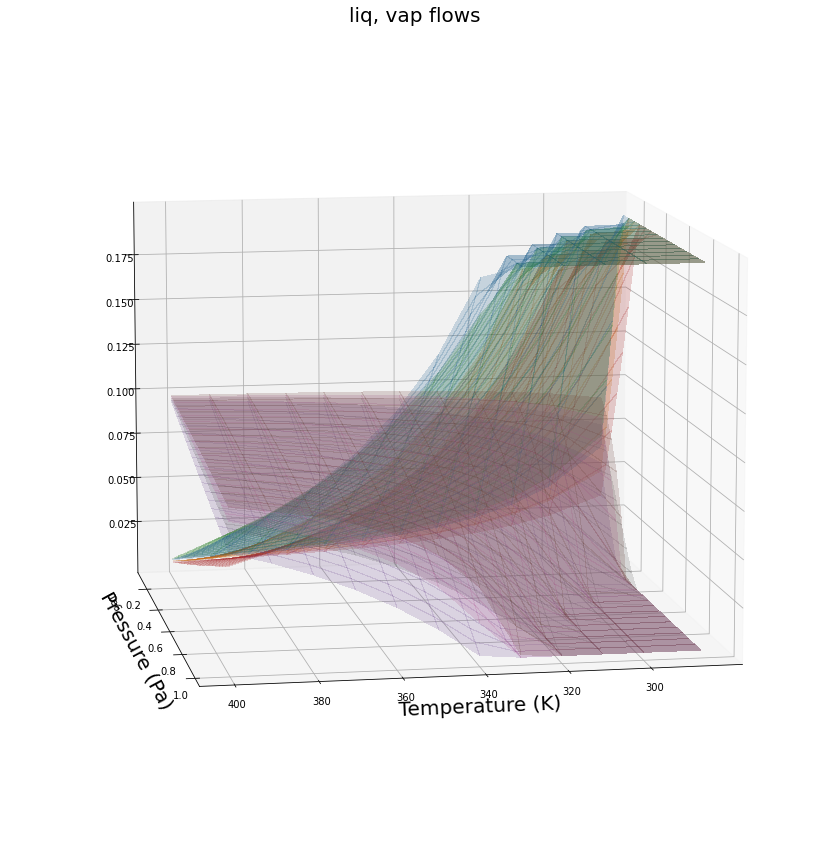

In [12]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(15,15))

X, Y = np.meshgrid(T, P)  

# surf = ax.plot_surface(X, Y, VR32_1, 
#                        linewidth=0,
#                         alpha=0.2,antialiased=False)
# surf = ax.plot_surface(X, Y, VR32_2, 
#                        linewidth=0,
#                         alpha=0.2, antialiased=False)
# surf = ax.plot_surface(X, Y, VR32_3, 
#                        linewidth=0,
#                         alpha=0.2, antialiased=False)
# surf = ax.plot_surface(X, Y, VR32_4, 
#                        linewidth=0,
#                         alpha=0.2, antialiased=False)

surf = ax.plot_surface(X, Y, LR32_1, 
                       linewidth=0,
                        alpha=0.2,antialiased=False)
surf = ax.plot_surface(X, Y, LR32_2, 
                       linewidth=0,
                        alpha=0.2, antialiased=False)
surf = ax.plot_surface(X, Y, LR32_3, 
                       linewidth=0,
                        alpha=0.2, antialiased=False)
surf = ax.plot_surface(X, Y, LR32_4, 
                       linewidth=0,
                        alpha=0.2, antialiased=False)

surf = ax.plot_surface(X, Y, VR125_1, 
                       linewidth=0,
                        alpha=0.2,antialiased=False)
surf = ax.plot_surface(X, Y, VR125_2, 
                       linewidth=0,
                        alpha=0.2, antialiased=False)
surf = ax.plot_surface(X, Y, VR125_3, 
                       linewidth=0,
                        alpha=0.2, antialiased=False)
surf = ax.plot_surface(X, Y, VR125_4, 
                       linewidth=0,
                        alpha=0.2, antialiased=False)

# surf = ax.plot_surface(X, Y, LR125_1, 
#                        linewidth=0,
#                         alpha=0.2,antialiased=False)
# surf = ax.plot_surface(X, Y, LR125_2, 
#                        linewidth=0,
#                         alpha=0.2, antialiased=False)
# surf = ax.plot_surface(X, Y, LR125_3, 
#                        linewidth=0,
#                         alpha=0.2, antialiased=False)
# surf = ax.plot_surface(X, Y, LR125_4, 
#                        linewidth=0,
#                         alpha=0.2, antialiased=False)

ax.set_title("liq, vap flows",fontsize=20)
plt.xlabel('Temperature (K)',fontsize=20)
plt.ylabel('Pressure (Pa)',fontsize=20)
# plt.zlabel('Mole flow',fontsize=20)

ax.azim = 80
ax.dist = 10
ax.elev = 10
    
plt.show()

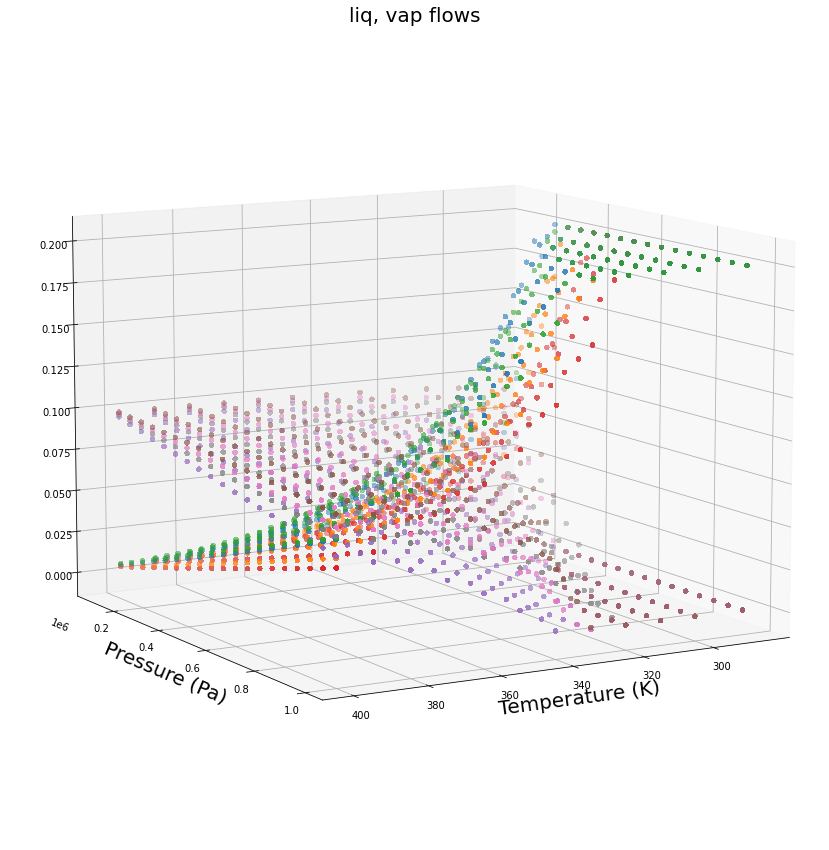

In [32]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize=(15,15))

X, Y = np.meshgrid(T, P)  

surf = ax.scatter(X, Y, LR32_1, 
                       linewidth=0, antialiased=False)
surf = ax.scatter(X, Y, LR32_2, 
                       linewidth=0, antialiased=False)
surf = ax.scatter(X, Y, LR32_3, 
                       linewidth=0, antialiased=False)
surf = ax.scatter(X, Y, LR32_4, 
                       linewidth=0, antialiased=False)

surf = ax.scatter(X, Y, VR125_1, 
                       linewidth=0, antialiased=False)
surf = ax.scatter(X, Y, VR125_2, 
                       linewidth=0, antialiased=False)
surf = ax.scatter(X, Y, VR125_3, 
                       linewidth=0, antialiased=False)
surf = ax.scatter(X, Y, VR125_4, 
                       linewidth=0, antialiased=False)

ax.set_title("liq, vap flows",fontsize=20)
plt.xlabel('Temperature (K)',fontsize=20)
plt.ylabel('Pressure (Pa)',fontsize=20)
# plt.ylabel('Mole flow',fontsize=20)

ax.azim = 60
ax.dist = 10
ax.elev = 10
    
plt.show()

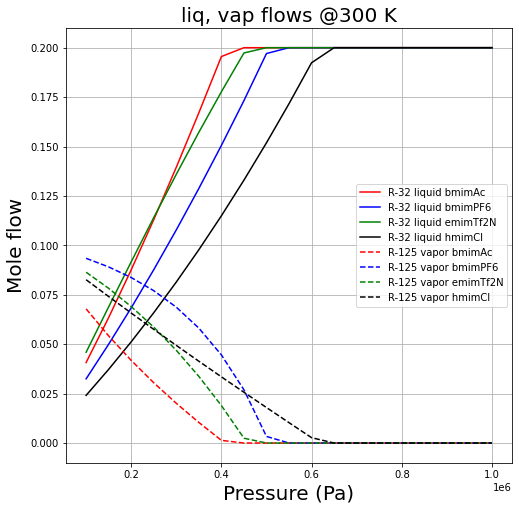

In [14]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

plt.plot(P,LR32_1[:,1],linestyle='-', color='red',label="R-32 liquid bmimAc")  
plt.plot(P,LR32_2[:,1],linestyle='-', color='blue',label="R-32 liquid bmimPF6")  
plt.plot(P,LR32_3[:,1],linestyle='-', color='green',label="R-32 liquid emimTf2N")  
plt.plot(P,LR32_4[:,1],linestyle='-', color='black',label="R-32 liquid hmimCl")    
plt.plot(P,VR125_1[:,1], linestyle='--', color='red',label="R-125 vapor bmimAc")  
plt.plot(P,VR125_2[:,1], linestyle='--', color='blue',label="R-125 vapor bmimPF6")  
plt.plot(P,VR125_3[:,1], linestyle='--', color='green',label="R-125 vapor emimTf2N")  
plt.plot(P,VR125_4[:,1], linestyle='--', color='black',label="R-125 vapor hmimCl")  

ax.set_title("liq, vap flows @300 K",fontsize=20)
plt.xlabel('Pressure (Pa)',fontsize=20)
plt.ylabel('Mole flow',fontsize=20)
plt.grid(True)
plt.legend()
# ax.set_ylim([0.01, 0.25])
# ax.set_xlim([1e5, 2.5e5])
plt.show()

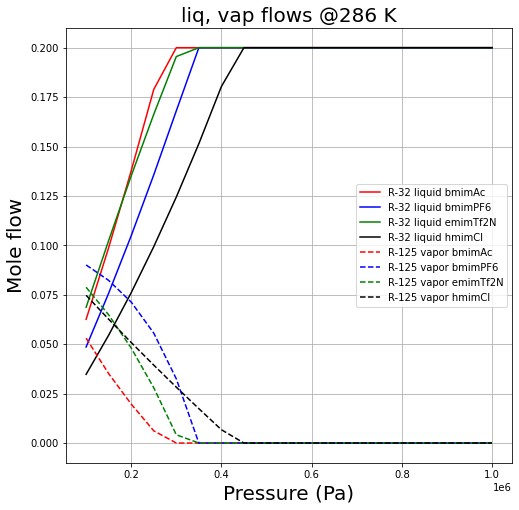

In [15]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

plt.plot(P,LR32_1[:,0],linestyle='-', color='red',label="R-32 liquid bmimAc")  
plt.plot(P,LR32_2[:,0],linestyle='-', color='blue',label="R-32 liquid bmimPF6")  
plt.plot(P,LR32_3[:,0],linestyle='-', color='green',label="R-32 liquid emimTf2N")  
plt.plot(P,LR32_4[:,0],linestyle='-', color='black',label="R-32 liquid hmimCl")    
plt.plot(P,VR125_1[:,0], linestyle='--', color='red',label="R-125 vapor bmimAc")  
plt.plot(P,VR125_2[:,0], linestyle='--', color='blue',label="R-125 vapor bmimPF6")  
plt.plot(P,VR125_3[:,0], linestyle='--', color='green',label="R-125 vapor emimTf2N")  
plt.plot(P,VR125_4[:,0], linestyle='--', color='black',label="R-125 vapor hmimCl")  

ax.set_title("liq, vap flows @286 K",fontsize=20)
plt.xlabel('Pressure (Pa)',fontsize=20)
plt.ylabel('Mole flow',fontsize=20)
plt.grid(True)
plt.legend()
# ax.set_ylim([0.01, 0.25])
# ax.set_xlim([1e5, 2.5e5])
plt.show()

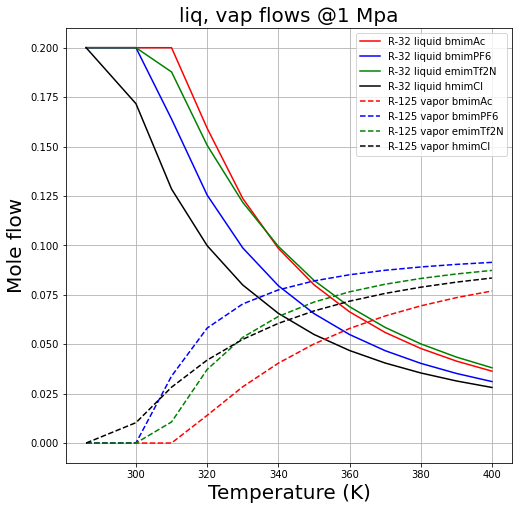

In [16]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

plt.plot(T,LR32_1[9,:],linestyle='-', color='red',label="R-32 liquid bmimAc")  
plt.plot(T,LR32_2[9,:],linestyle='-', color='blue',label="R-32 liquid bmimPF6")  
plt.plot(T,LR32_3[9,:],linestyle='-', color='green',label="R-32 liquid emimTf2N")  
plt.plot(T,LR32_4[9,:],linestyle='-', color='black',label="R-32 liquid hmimCl")    
plt.plot(T,VR125_1[9,:], linestyle='--', color='red',label="R-125 vapor bmimAc")  
plt.plot(T,VR125_2[9,:], linestyle='--', color='blue',label="R-125 vapor bmimPF6")  
plt.plot(T,VR125_3[9,:], linestyle='--', color='green',label="R-125 vapor emimTf2N")  
plt.plot(T,VR125_4[9,:], linestyle='--', color='black',label="R-125 vapor hmimCl")  

ax.set_title("liq, vap flows @1 Mpa",fontsize=20)
plt.xlabel('Temperature (K)',fontsize=20)
plt.ylabel('Mole flow',fontsize=20)
plt.grid(True)
plt.legend()
# ax.set_ylim([0.01, 0.25])
# ax.set_xlim([1e5, 2.5e5])
plt.show()

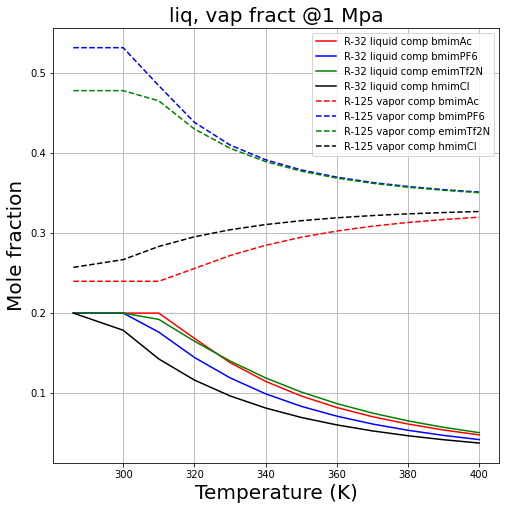

In [17]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

plt.plot(T,R32_x1[9,:],linestyle='-', color='red',label="R-32 liquid comp bmimAc")  
plt.plot(T,R32_x2[9,:],linestyle='-', color='blue',label="R-32 liquid comp bmimPF6")  
plt.plot(T,R32_x3[9,:],linestyle='-', color='green',label="R-32 liquid comp emimTf2N")  
plt.plot(T,R32_x4[9,:],linestyle='-', color='black',label="R-32 liquid comp hmimCl")    
plt.plot(T,R125_y1[9,:], linestyle='--', color='red',label="R-125 vapor comp bmimAc")  
plt.plot(T,R125_y2[9,:], linestyle='--', color='blue',label="R-125 vapor comp bmimPF6")  
plt.plot(T,R125_y3[9,:], linestyle='--', color='green',label="R-125 vapor comp emimTf2N")  
plt.plot(T,R125_y4[9,:], linestyle='--', color='black',label="R-125 vapor comp hmimCl")  

ax.set_title("liq, vap fract @1 Mpa",fontsize=20)
plt.xlabel('Temperature (K)',fontsize=20)
plt.ylabel('Mole fraction',fontsize=20)
plt.grid(True)
plt.legend()
# ax.set_ylim([0.01, 0.25])
# ax.set_xlim([1e5, 2.5e5])
plt.show()

In [22]:
PVR32_1 = np.zeros((len(P),(len(T))))
PVR125_1 = np.zeros((len(P),(len(T))))
PLR32_1 = np.zeros((len(P),(len(T))))
PLR125_1 = np.zeros((len(P),(len(T))))

PVR32_2 = np.zeros((len(P),(len(T))))
PVR125_2 = np.zeros((len(P),(len(T))))
PLR32_2 = np.zeros((len(P),(len(T))))
PLR125_2 = np.zeros((len(P),(len(T))))

PVR32_3 = np.zeros((len(P),(len(T))))
PVR125_3 = np.zeros((len(P),(len(T))))
PLR32_3 = np.zeros((len(P),(len(T))))
PLR125_3 = np.zeros((len(P),(len(T))))

PVR32_4 = np.zeros((len(P),(len(T))))
PVR125_4 = np.zeros((len(P),(len(T))))
PLR32_4 = np.zeros((len(P),(len(T))))
PLR125_4 = np.zeros((len(P),(len(T))))


for j in range(len(T)):
    for i in range(len(P)):
        PVR32_1[i,j] = VR32_1[i,j]/0.2
        PVR125_1[i,j] = VR125_1[i,j]/0.1
        PLR32_1[i,j] = LR32_1[i,j]/0.2
        PLR125_1[i,j] = LR125_1[i,j]/0.1

        PVR32_2[i,j] = VR32_2[i,j]/0.2
        PVR125_2[i,j] = VR125_2[i,j]/0.1
        PLR32_2[i,j] = LR32_2[i,j]/0.2
        PLR125_2[i,j] = LR125_2[i,j]/0.1

        PVR32_3[i,j] = VR32_3[i,j]/0.2
        PVR125_3[i,j] = VR125_3[i,j]/0.1
        PLR32_3[i,j] = LR32_3[i,j]/0.2
        PLR125_3[i,j] = LR125_3[i,j]/0.1

        PVR32_4[i,j] = VR32_4[i,j]/0.2
        PVR125_4[i,j] = VR125_4[i,j]/0.1
        PLR32_4[i,j] = LR32_4[i,j]/0.2
        PLR125_4[i,j] = LR125_4[i,j]/0.1

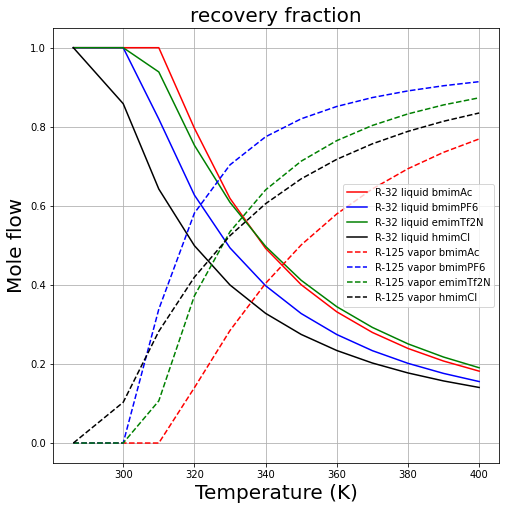

In [23]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

plt.plot(T,PLR32_1[9,:],linestyle='-', color='red',label="R-32 liquid bmimAc")  
plt.plot(T,PLR32_2[9,:],linestyle='-', color='blue',label="R-32 liquid bmimPF6")  
plt.plot(T,PLR32_3[9,:],linestyle='-', color='green',label="R-32 liquid emimTf2N")  
plt.plot(T,PLR32_4[9,:],linestyle='-', color='black',label="R-32 liquid hmimCl")    
plt.plot(T,PVR125_1[9,:], linestyle='--', color='red',label="R-125 vapor bmimAc")  
plt.plot(T,PVR125_2[9,:], linestyle='--', color='blue',label="R-125 vapor bmimPF6")  
plt.plot(T,PVR125_3[9,:], linestyle='--', color='green',label="R-125 vapor emimTf2N")  
plt.plot(T,PVR125_4[9,:], linestyle='--', color='black',label="R-125 vapor hmimCl")  

ax.set_title("recovery fraction",fontsize=20)
plt.xlabel('Temperature (K)',fontsize=20)
plt.ylabel('Mole flow',fontsize=20)
plt.grid(True)
plt.legend()
# ax.set_ylim([0.01, 0.25])
# ax.set_xlim([1e5, 2.5e5])
plt.show()

In [24]:
PMP = np.zeros((len(P)))
for i in range(len(P)):
    PMP[i] = P[i]/1e6

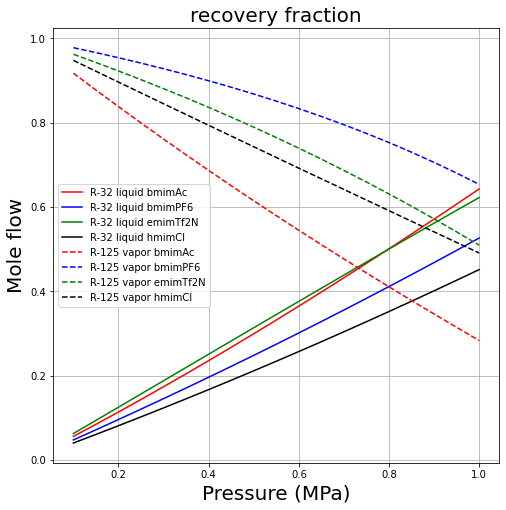

In [25]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

plt.plot(PMP,PLR32_1[:,7],linestyle='-', color='red',label="R-32 liquid bmimAc")  
plt.plot(PMP,PLR32_2[:,7],linestyle='-', color='blue',label="R-32 liquid bmimPF6")  
plt.plot(PMP,PLR32_3[:,7],linestyle='-', color='green',label="R-32 liquid emimTf2N")  
plt.plot(PMP,PLR32_4[:,7],linestyle='-', color='black',label="R-32 liquid hmimCl")    
plt.plot(PMP,PVR125_1[:,7], linestyle='--', color='red',label="R-125 vapor bmimAc")  
plt.plot(PMP,PVR125_2[:,7], linestyle='--', color='blue',label="R-125 vapor bmimPF6")  
plt.plot(PMP,PVR125_3[:,7], linestyle='--', color='green',label="R-125 vapor emimTf2N")  
plt.plot(PMP,PVR125_4[:,7], linestyle='--', color='black',label="R-125 vapor hmimCl")  

ax.set_title("recovery fraction",fontsize=20)
plt.xlabel('Pressure (MPa)',fontsize=20)
plt.ylabel('Mole flow',fontsize=20)
plt.grid(True)
plt.legend()
# ax.set_ylim([0.01, 0.25])
# ax.set_xlim([1e5, 2.5e5])
plt.show()

In [26]:
MFVR32_1 = np.zeros((len(P),(len(T))))
MFVR125_1 = np.zeros((len(P),(len(T))))
MFLR32_1 = np.zeros((len(P),(len(T))))
MFLR125_1 = np.zeros((len(P),(len(T))))

MFVR32_2 = np.zeros((len(P),(len(T))))
MFVR125_2 = np.zeros((len(P),(len(T))))
MFLR32_2 = np.zeros((len(P),(len(T))))
MFLR125_2 = np.zeros((len(P),(len(T))))

MFVR32_3 = np.zeros((len(P),(len(T))))
MFVR125_3 = np.zeros((len(P),(len(T))))
MFLR32_3 = np.zeros((len(P),(len(T))))
MFLR125_3 = np.zeros((len(P),(len(T))))

MFVR32_4 = np.zeros((len(P),(len(T))))
MFVR125_4 = np.zeros((len(P),(len(T))))
MFLR32_4 = np.zeros((len(P),(len(T))))
MFLR125_4 = np.zeros((len(P),(len(T))))

for j in range(len(T)):
    for i in range(len(P)):
        MFVR32_1[i,j] = R32_y1[i,j] / (R32_y1[i,j]+R125_y1[i,j])
        MFVR125_1[i,j] = R125_y1[i,j] / (R32_y1[i,j]+R125_y1[i,j])
        MFLR32_1[i,j] = R32_x1[i,j] / (R32_x1[i,j]+R125_x1[i,j])
        MFLR125_1[i,j] = R125_x1[i,j] / (R32_x1[i,j]+R125_x1[i,j])

        MFVR32_2[i,j] = R32_y2[i,j] / (R32_y2[i,j]+R125_y2[i,j])
        MFVR125_2[i,j] = R125_y2[i,j] / (R32_y2[i,j]+R125_y2[i,j])
        MFLR32_2[i,j] = R32_x2[i,j] / (R32_x2[i,j]+R125_x2[i,j])
        MFLR125_2[i,j] = R125_x2[i,j] / (R32_x2[i,j]+R125_x2[i,j])

        MFVR32_3[i,j] = R32_y3[i,j] / (R32_y3[i,j]+R125_y3[i,j])
        MFVR125_3[i,j] = R125_y3[i,j] / (R32_y3[i,j]+R125_y3[i,j])
        MFLR32_3[i,j] = R32_x3[i,j] / (R32_x3[i,j]+R125_x3[i,j])
        MFLR125_3[i,j] = R125_x3[i,j] / (R32_x3[i,j]+R125_x3[i,j])

        MFVR32_4[i,j] = R32_y4[i,j] / (R32_y4[i,j]+R125_y4[i,j])
        MFVR125_4[i,j] = R125_y4[i,j] / (R32_y4[i,j]+R125_y4[i,j])
        MFLR32_4[i,j] = R32_x4[i,j] / (R32_x4[i,j]+R125_x4[i,j])
        MFLR125_4[i,j] = R125_x4[i,j] / (R32_x4[i,j]+R125_x4[i,j])

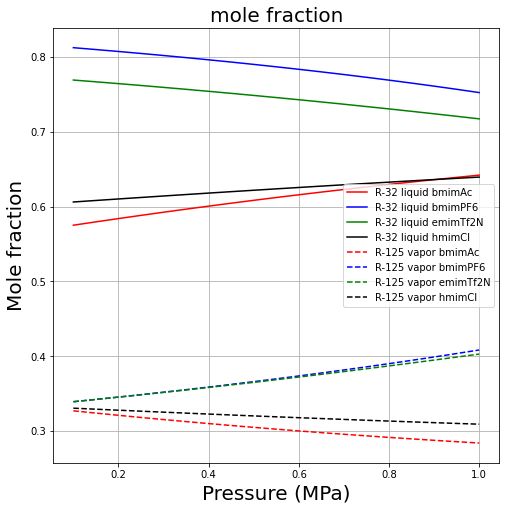

In [36]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

plt.plot(PMP,MFLR32_1[:,7],linestyle='-', color='red',label="R-32 liquid bmimAc")  
plt.plot(PMP,MFLR32_2[:,7],linestyle='-', color='blue',label="R-32 liquid bmimPF6")  
plt.plot(PMP,MFLR32_3[:,7],linestyle='-', color='green',label="R-32 liquid emimTf2N")  
plt.plot(PMP,MFLR32_4[:,7],linestyle='-', color='black',label="R-32 liquid hmimCl")    
plt.plot(PMP,MFVR125_1[:,7], linestyle='--', color='red',label="R-125 vapor bmimAc")  
plt.plot(PMP,MFVR125_2[:,7], linestyle='--', color='blue',label="R-125 vapor bmimPF6")  
plt.plot(PMP,MFVR125_3[:,7], linestyle='--', color='green',label="R-125 vapor emimTf2N")  
plt.plot(PMP,MFVR125_4[:,7], linestyle='--', color='black',label="R-125 vapor hmimCl")  

ax.set_title("mole fraction",fontsize=20)
plt.xlabel('Pressure (MPa)',fontsize=20)
plt.ylabel('Mole fraction',fontsize=20)
plt.grid(True)
plt.legend()
# ax.set_ylim([0.01, 0.25])
# ax.set_xlim([1e5, 2.5e5])
plt.show()

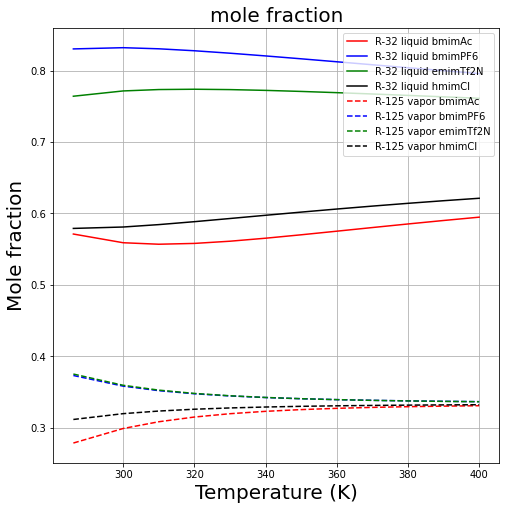

In [33]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

plt.plot(T,MFLR32_1[0,:],linestyle='-', color='red',label="R-32 liquid bmimAc")  
plt.plot(T,MFLR32_2[0,:],linestyle='-', color='blue',label="R-32 liquid bmimPF6")  
plt.plot(T,MFLR32_3[0,:],linestyle='-', color='green',label="R-32 liquid emimTf2N")  
plt.plot(T,MFLR32_4[0,:],linestyle='-', color='black',label="R-32 liquid hmimCl")    
plt.plot(T,MFVR125_1[0,:], linestyle='--', color='red',label="R-125 vapor bmimAc")  
plt.plot(T,MFVR125_2[0,:], linestyle='--', color='blue',label="R-125 vapor bmimPF6")  
plt.plot(T,MFVR125_3[0,:], linestyle='--', color='green',label="R-125 vapor emimTf2N")  
plt.plot(T,MFVR125_4[0,:], linestyle='--', color='black',label="R-125 vapor hmimCl")  

ax.set_title("mole fraction",fontsize=20)
plt.xlabel('Temperature (K)',fontsize=20)
plt.ylabel('Mole fraction',fontsize=20)
plt.grid(True)
plt.legend()
# ax.set_ylim([0.01, 0.25])
# ax.set_xlim([1e5, 2.5e5])
plt.show()

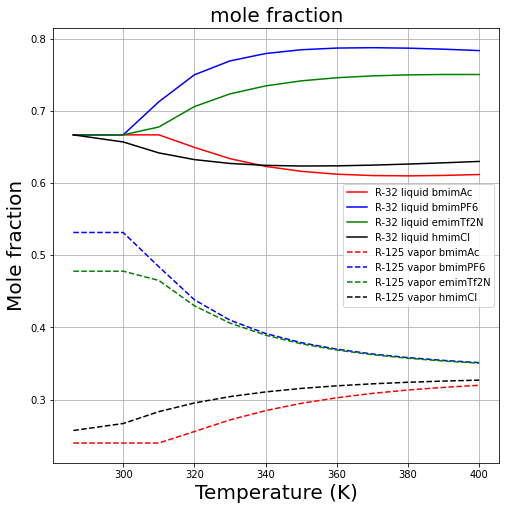

In [30]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)

plt.plot(T,MFLR32_1[9,:],linestyle='-', color='red',label="R-32 liquid bmimAc")  
plt.plot(T,MFLR32_2[9,:],linestyle='-', color='blue',label="R-32 liquid bmimPF6")  
plt.plot(T,MFLR32_3[9,:],linestyle='-', color='green',label="R-32 liquid emimTf2N")  
plt.plot(T,MFLR32_4[9,:],linestyle='-', color='black',label="R-32 liquid hmimCl")    
plt.plot(T,MFVR125_1[9,:], linestyle='--', color='red',label="R-125 vapor bmimAc")  
plt.plot(T,MFVR125_2[9,:], linestyle='--', color='blue',label="R-125 vapor bmimPF6")  
plt.plot(T,MFVR125_3[9,:], linestyle='--', color='green',label="R-125 vapor emimTf2N")  
plt.plot(T,MFVR125_4[9,:], linestyle='--', color='black',label="R-125 vapor hmimCl")  

ax.set_title("mole fraction",fontsize=20)
plt.xlabel('Temperature (K)',fontsize=20)
plt.ylabel('Mole fraction',fontsize=20)
plt.grid(True)
plt.legend()
# ax.set_ylim([0.01, 0.25])
# ax.set_xlim([1e5, 2.5e5])
plt.show()